In [12]:
import numpy as np
import pandas as pd
from CSVUtils import *
import pickle
from os import path
import matplotlib.pyplot as plt

In [3]:
tBill_dir = "./input/"
tbill_df = csv2df(tBill_dir, "^IRX.csv", source="yahoo")
tbill_df = tbill_df.dropna()
tbill_df.reset_index(inplace=True, drop=True)

In [4]:
tbill_df[:10]

,Date,Open,High,Low,Price,Vol,Change
0,1960-01-05,4.55,4.55,4.55,4.55,0.0,0.006637
1,1960-01-06,4.68,4.68,4.68,4.68,0.0,0.028571
2,1960-01-07,4.63,4.63,4.63,4.63,0.0,-0.010684
3,1960-01-08,4.59,4.59,4.59,4.59,0.0,-0.008639
4,1960-01-11,4.54,4.54,4.54,4.54,0.0,-0.010893
5,1960-01-12,4.54,4.54,4.54,4.54,0.0,0.000000
6,1960-01-13,4.56,4.56,4.56,4.56,0.0,0.004405
7,1960-01-14,4.51,4.51,4.51,4.51,0.0,-0.010965
8,1960-01-15,4.49,4.49,4.49,4.49,0.0,-0.004435
9,1960-01-18,4.37,4.37,4.37,4.37,0.0,-0.026726


In [5]:
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")
np.mean(tbill_df[(tbill_df["Date"]>=startDate) & (tbill_df["Date"]<=endDate)]['Price'])*0.01

0.01041641826923077

In [34]:
startDate: pd.to_datetime("2001-01-01")
endDate: pd.to_datetime("2004-12-31")
price_dir = "./from github/Stock-Trading-Environment/data"
file_names = ["^BVSP_new", "^TWII_new", "^IXIC_new"]
from CSVUtils import csv2df
df_list = []
for name in file_names:
    df = csv2df(price_dir, name+".csv", source="done")
    df = df[(df['Date']>=startDate)&(df['Date']<=endDate)].reset_index(drop = True)
    init_value = 100000
    start_price = df['Actual Price'][0]
    inv_number = init_value/start_price
    df['BuyNHold'] = df['Actual Price']*inv_number
    df_list.append(df)
buyNHold_totalValue = df_list[0]['BuyNHold'] +df_list[1]['BuyNHold']+df_list[2]['BuyNHold']


In [36]:
def getBuyNHold(startDate, endDate):
    price_dir = "./from github/Stock-Trading-Environment/data"
    file_names = ["^BVSP_new", "^TWII_new", "^IXIC_new"]
    from CSVUtils import csv2df
    df_list = []
    for name in file_names:
        df = csv2df(price_dir, name+".csv", source="done")
        df = df[(df['Date']>=startDate)&(df['Date']<=endDate)].reset_index(drop = True)
        init_value = 100000
        start_price = df['Actual Price'][0]
        inv_number = init_value/start_price
        df['BuyNHold'] = df['Actual Price']*inv_number
        df_list.append(df)
    buyNHold_totalValue = df_list[0]['BuyNHold'] +df_list[1]['BuyNHold']+df_list[2]['BuyNHold']
    return buyNHold_totalValue

In [37]:
def getSharpeRatio(netValue, startDate, endDate, tbill_df):
    RISKFREE = 0.035
    print(netValue.iloc[0], netValue.iloc[-1])
    ratioSeries = netValue/netValue.iloc[0]
    riskFree = np.mean(tbill_df[(tbill_df["Date"]>=startDate) & (tbill_df["Date"]<=endDate)]['Price'])*0.01
    finalReturn = (ratioSeries.iloc[-1]-ratioSeries.iloc[0]-riskFree)/ratioSeries.iloc[0]
    return finalReturn/np.std(ratioSeries)

In [38]:
def getSharpeRatioByDate(startDate, endDate, tbill_df):
    netValue = getBuyNHold(startDate, endDate)
    return getSharpeRatio(netValue, startDate, endDate, tbill_df)

In [39]:
startDate = pd.to_datetime("2015-01-01")
endDate = pd.to_datetime("2019-12-31")
getSharpeRatioByDate(startDate, endDate, tbill_df)

300000.0 518237.12345884787


3.0693999444726088

In [40]:
startDate = pd.to_datetime("2007-01-01")
endDate = pd.to_datetime("2010-12-31")
getSharpeRatioByDate(startDate, endDate, tbill_df)

300000.0 417726.6062059703


1.8942480597911275

In [41]:
startDate = pd.to_datetime("2001-01-01")
endDate = pd.to_datetime("2004-12-31")
getSharpeRatioByDate(startDate, endDate, tbill_df)

300000.0 358863.9586947755


1.0730432708521411

In [44]:
plot_input = {
    "w/o Cash-out":
        {"2015-2019":{
            "DIR": "./output/306",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/307",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/308",
            "prefix": "BRZ_TW_NASDAQ-Selected_Trans-withleakage+RSI-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "20% Cash-out":{
        "2015-2019":{
            "DIR": "./output/410",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/411",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/412",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "15% Cash-out":{
        "2015-2019":{
            "DIR": "./output/420",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/421",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/422",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
    "10% Cash-out":{
        "2015-2019":{
            "DIR": "./output/430",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2015-01-01"),
            "end_date": pd.to_datetime("2019-12-31"),
        },
        "2001-2004":{
            "DIR": "./output/431",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2001-01-01"),
            "end_date": pd.to_datetime("2004-12-31"),
        },
        "2007-2010":{
            "DIR": "./output/432",
            "prefix": "Testing_cashout-20-_detailed-ModelNo-200000-",
            "start_date": pd.to_datetime("2007-01-01"),
            "end_date": pd.to_datetime("2010-12-31"),
        },
    },
}

bnh_ratio={
    "2015-2019": 3.0693999444726088,
    "2001-2004": 1.0730432708521411,
    "2007-2010": 1.8942480597911275,
}

300000.0 478920.2434799275
2015-2019 w/o Cash-out 0 2.907290846822229
300000.0 613468.8251798699
2015-2019 w/o Cash-out 1 3.067293271308935
300000.0 621600.4077353275
2015-2019 w/o Cash-out 2 3.3337547978331257
300000.0 478463.1212817625
2015-2019 w/o Cash-out 3 2.5552364416906204
300000.0 476678.47144811344
2015-2019 w/o Cash-out 4 2.796906750285803
300000.0 641770.5614801235
2015-2019 w/o Cash-out 5 3.260725684745218
300000.0 550205.8297606015
2015-2019 w/o Cash-out 6 3.2196967304026445
300000.0 559013.0934103056
2015-2019 w/o Cash-out 7 3.166416102373691
300000.0 440948.7867867313
2015-2019 w/o Cash-out 8 2.78958657374563
300000.0 477112.18031458685
2015-2019 w/o Cash-out 9 2.860132280475718
 2015-2019 w/o Cash-out 2.9957039479683614 

300000.0 463248.3362153181
2015-2019 20% Cash-out 0 2.621534696960391
300000.0 600671.1431577682
2015-2019 20% Cash-out 1 3.1188936160041916
300000.0 526287.4870051055
2015-2019 20% Cash-out 2 3.384933735945755
300000.0 497834.7513649417
2015-2019 20%

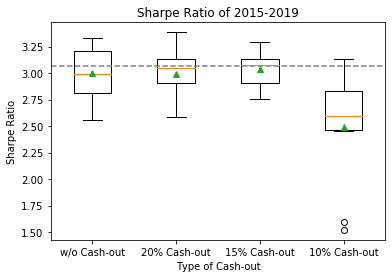

300000.0 235729.81826534602
2001-2004 w/o Cash-out 0 -1.4841586922128918
300000.0 365559.3383015929
2001-2004 w/o Cash-out 1 1.0275790708168624
300000.0 196398.9210782838
2001-2004 w/o Cash-out 2 -3.0877992566733052
300000.0 354840.66623097943
2001-2004 w/o Cash-out 3 0.8764402004309237
300000.0 278642.50915944803
2001-2004 w/o Cash-out 4 -0.7697531260245002
300000.0 366544.9274792608
2001-2004 w/o Cash-out 5 0.9588426519496356
300000.0 276008.58724064304
2001-2004 w/o Cash-out 6 -0.6902015585201732
300000.0 434863.4655956893
2001-2004 w/o Cash-out 7 1.658069022160744
300000.0 260610.63577586893
2001-2004 w/o Cash-out 8 -1.1817599428057977
300000.0 285489.32941691333
2001-2004 w/o Cash-out 9 -0.48138264897316785
 2001-2004 w/o Cash-out -0.317412427985167 

300000.0 178362.9260729744
2001-2004 20% Cash-out 0 -3.0767601902379442
300000.0 303239.41149740265
2001-2004 20% Cash-out 1 -0.05112571169340456
300000.0 228515.72305404278
2001-2004 20% Cash-out 2 -1.8713874048597534
300000.0 29627

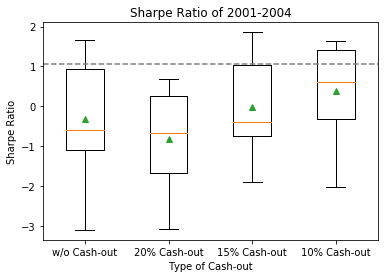

300000.0 346506.9704036454
2007-2010 w/o Cash-out 0 0.9026864561907254
300000.0 387786.45036703226
2007-2010 w/o Cash-out 1 1.5941335724865209
300000.0 336362.4799954365
2007-2010 w/o Cash-out 2 0.7061786721187814
300000.0 332677.2708363812
2007-2010 w/o Cash-out 3 0.5436801753889465
300000.0 465496.5560076053
2007-2010 w/o Cash-out 4 2.9729663327358007
300000.0 364058.82927441975
2007-2010 w/o Cash-out 5 1.2399900447480932
300000.0 351857.67247994326
2007-2010 w/o Cash-out 6 0.8887726813284971
300000.0 431701.5568465076
2007-2010 w/o Cash-out 7 2.0517654232671907
300000.0 402707.98327315634
2007-2010 w/o Cash-out 8 1.9503179402354258
300000.0 347289.62918077124
2007-2010 w/o Cash-out 9 0.8008753810878401
 2007-2010 w/o Cash-out 1.3651366679587822 

300000.0 409525.62994019635
2007-2010 20% Cash-out 0 2.690748406036034
300000.0 456829.7306997907
2007-2010 20% Cash-out 1 3.00784112565666
300000.0 325908.0295926636
2007-2010 20% Cash-out 2 0.6162975182854433
300000.0 452375.50480677024
2

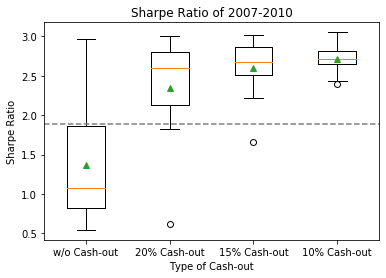

In [45]:
types = ["w/o Cash-out", "20% Cash-out", "15% Cash-out", "10% Cash-out"]
periods = ["2015-2019", "2001-2004", "2007-2010"]
# period = periods[0]
for period in periods:
    period_result = []
    for tmp_type in types:
        DIR = "./from github/Stock-Trading-Environment"+plot_input[tmp_type][period]["DIR"]
        sharpe_list = []
        for i in range(10):
            record = pickle.load(open(path.join(DIR,plot_input[tmp_type][period]["prefix"]+str(i)+".out"), "rb"))
            df = pd.DataFrame(record)
            startDate = plot_input[tmp_type][period]["start_date"]
            endDate = plot_input[tmp_type][period]["end_date"]
            sharpe = getSharpeRatio(df["net_worth"], startDate, endDate, tbill_df)
            sharpe_list.append(sharpe)
            print(period, tmp_type, i, sharpe)
        avg_sharpe = np.mean(sharpe_list)
        period_result.append(np.array(sharpe_list))
        print("=========\n", period, tmp_type, avg_sharpe, "\n=========\n")

    plt.boxplot(period_result, labels=types, showmeans=True)
    plt.axhline(y=bnh_ratio[period], color = "grey", linestyle='--')
    plt.ylabel("Sharpe Ratio")
    plt.xlabel("Type of Cash-out")
    plt.title("Sharpe Ratio of "+period)
    plt.show()

In [ ]:
types = ["w/o Cash-out", "20% Cash-out", "15% Cash-out", "10% Cash-out"]
periods = ["2015-2019", "2001-2004", "2007-2010"]
# period = periods[0]
for period in periods:
    period_result = []
    for tmp_type in types:
        DIR = plot_input[tmp_type][period]["DIR"]
        batch_result = []
        for i in range(10):
            record = pickle.load(open(path.join(DIR,plot_input[tmp_type][period]["prefix"]+str(i)+".out"), "rb"))
            df = pd.DataFrame(record)
            result = dict(df['actual_profit'].describe())
            result['act_perc'] = df['actual_profit'].values[-1]/df['buyNhold_balance'].values[-1]
            batch_result.append(result)
        batch_result = pd.DataFrame(batch_result)
        period_result.append(np.array(batch_result['act_perc']))
    plt.boxplot([tmp*100 for tmp in period_result], labels=types, showmeans=True)
    plt.axhline(y=0, color = "grey", linestyle='--')
    plt.ylabel("Percentage better than Benchmark, %")
    plt.xlabel("Type of Cash-out")
    plt.title("Performance of "+period)
    plt.show()